# Class3: 茴香豆：搭建你的 RAG 智能助理

## 0 RAG概述

RAG（Retrieval Augmented Generation）技术，通过检索与用户输入相关的信息片段，并结合外部知识库来生成更准确、更丰富的回答。

解决 LLMs 在处理知识密集型任务时可能遇到的挑战, 如幻觉、知识过时和缺乏透明、可追溯的推理过程等。提供更准确的回答、降低推理成本、实现外部记忆。

RAG 能够让基础模型实现非参数知识更新，无需训练就可以掌握新领域的知识。本次课程选用的[茴香豆](https://github.com/InternLM/HuixiangDou)应用，就应用了 RAG 技术，可以快速、高效的搭建自己的知识领域助手。

### RAG工作原理

<img src="./img/img-20240412104523.png" width="80%">

经典的RAG包括3个部分，包括索引（Indexing）、检索（Retrieval）、生成（Generation）。

- 索引（Indexing）：将外部知识库（如知识库、文档、数据库等）分割成chunk，并转换为向量，以便进行向量检索。
- 检索（Retrieval）：接收到用户的问题，将问题编码成向量，通过向量检索，找到与用户输入最相关的信息片段。
- 生成（Generation）：根据用户输入和检索到的信息片段，作为prompt，生成答案。

除了3个最基本的特征，还需要知道Vector-DB（向量数据库），向量数据库是专门存储向量数据的数据库，可以快速进行向量检索。

向量数据库通过word2vec等成熟技术将上传的文本转化为向量，方便计算机存储和相似度检索

<img src="./img/img-20240412104642.png" width="80%">

### RAG 流程示例

用户的输入在向量数据库（知识库）中检索，具体的检索方式就是求相似度：

1.检索到的超过阈值的文本索引出来和prompt提供给LLM，给出回答；

2.未检索到的超过阈值的LLM根据输入和prompt给出回答；

<img src="./img/img-20240412104758.png" width="80%">

在传统的大模型当中，他会说**不知道**

在RAG当中，会去调用数据库，检索相关数据，然后生成答案

### RAG的发展进程

RAG的概念最早是由Meta ( Facebook )的Lewis等人在2020《Retrieval-Augmented Generation forKnowledge-Intensive NLP Tasks》中提出的。

目前有3种范式：

- Naive Rag用于简单的问答系统、信息检索, 

- Advanced RAG 是在3个基础部分之外，对于检索前后都进行了增强，在检索之前，对用户的问题进行扩展，对于检索到的信息进行重排序，总结，融合。**用在摘要生成、内容推荐**

- Modular RAG 可以用于多模态任务、对话系统

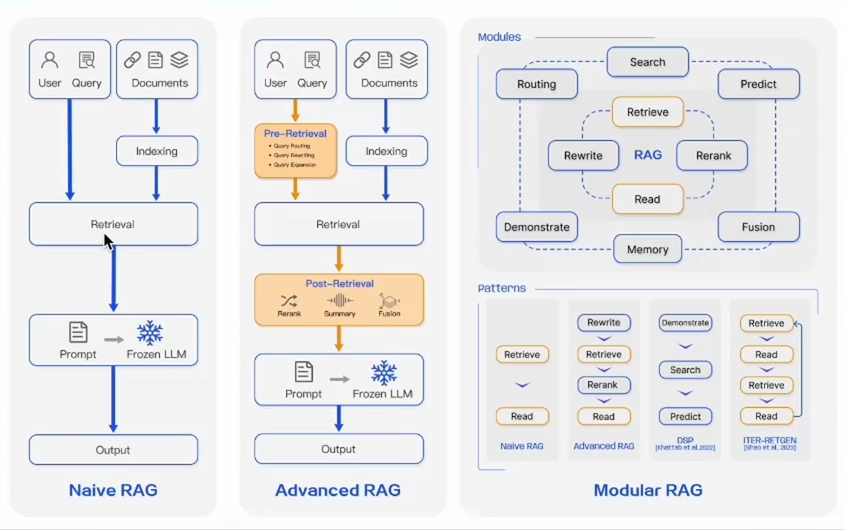

### RAG常见优化方法

上面RAG使用的流程中可以看到，RAG也面临许多问题，例如：本来知识库有的没检索出来 检索效率低等。

#### 添加向量数据库的质量

- 嵌入优化，结合稀疏和密集检索，以及多任务方法增强嵌入的性能

- 索引优化，通过增强数据粒度，添加元数据，添加索引质量

#### 查询过程的优化（Advanced RAG方法）

- 查询优化，查询扩展、转换、多查询

- 上下文管理

#### 检索的优化

- 迭代检索

- 递归检索

- 自适应检索

#### 大模型的微调

- LLM微调，检索微调、生成微调、双重微调

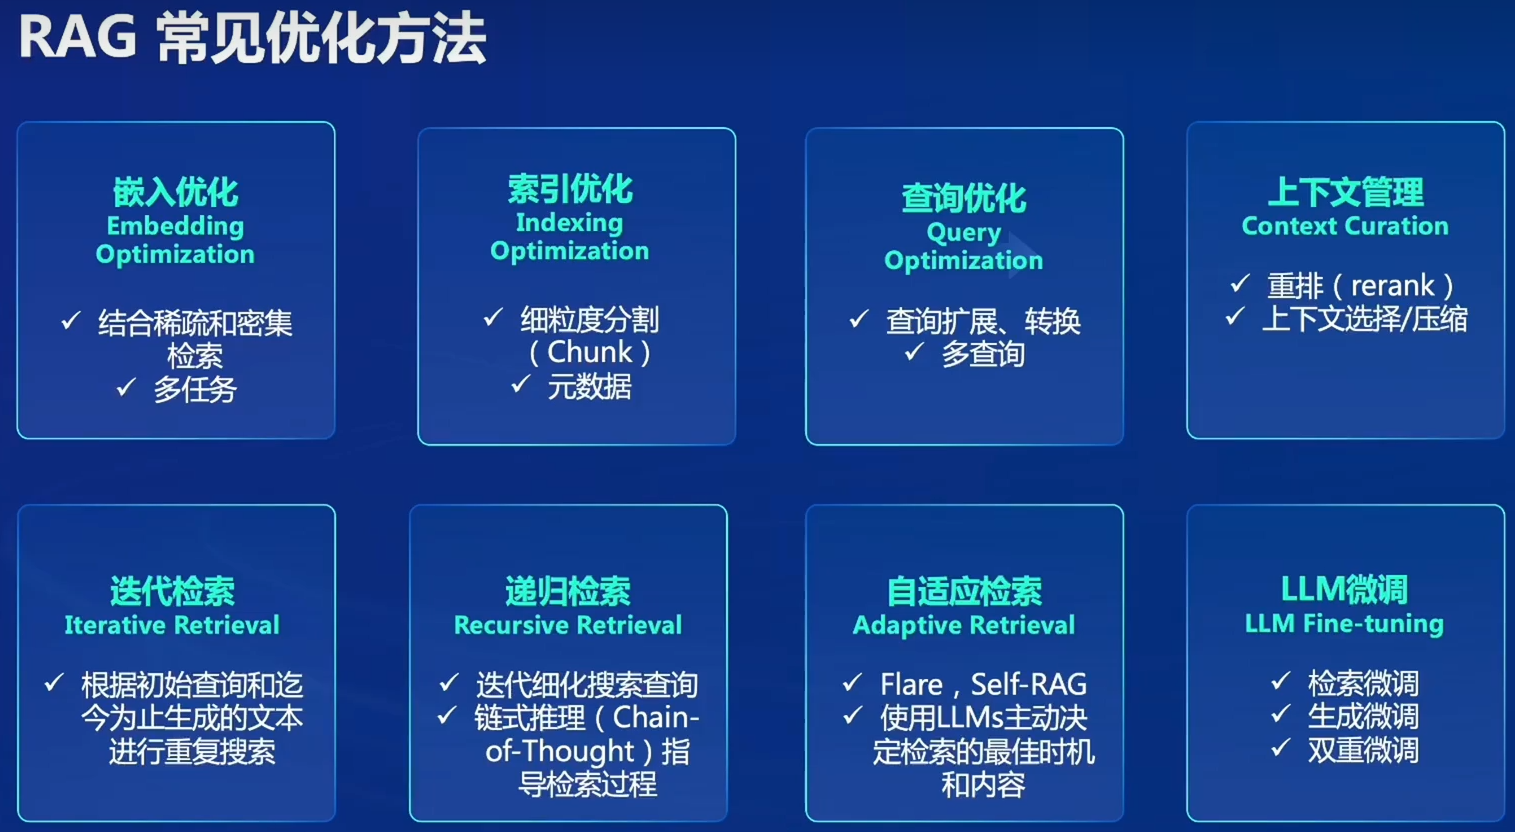

## RAG vs. 微调fine-tuning

### RAG 和 Fine-Tuning怎么选

具体是选择RAG还是 Fine-Tuning需要根据我们的实际任务来：

1.需要让LLM具备更多的外部知识库的能力，选择RAG；

2.需要让LLM在执行具体任务是有更强的适应能力，选择 Fine-Tuning；

3.既要1又要2，可以选择RAG和Fine-Tuning；

4.既不那么要1，也不那么要2，可以选择Prompt Engineering；

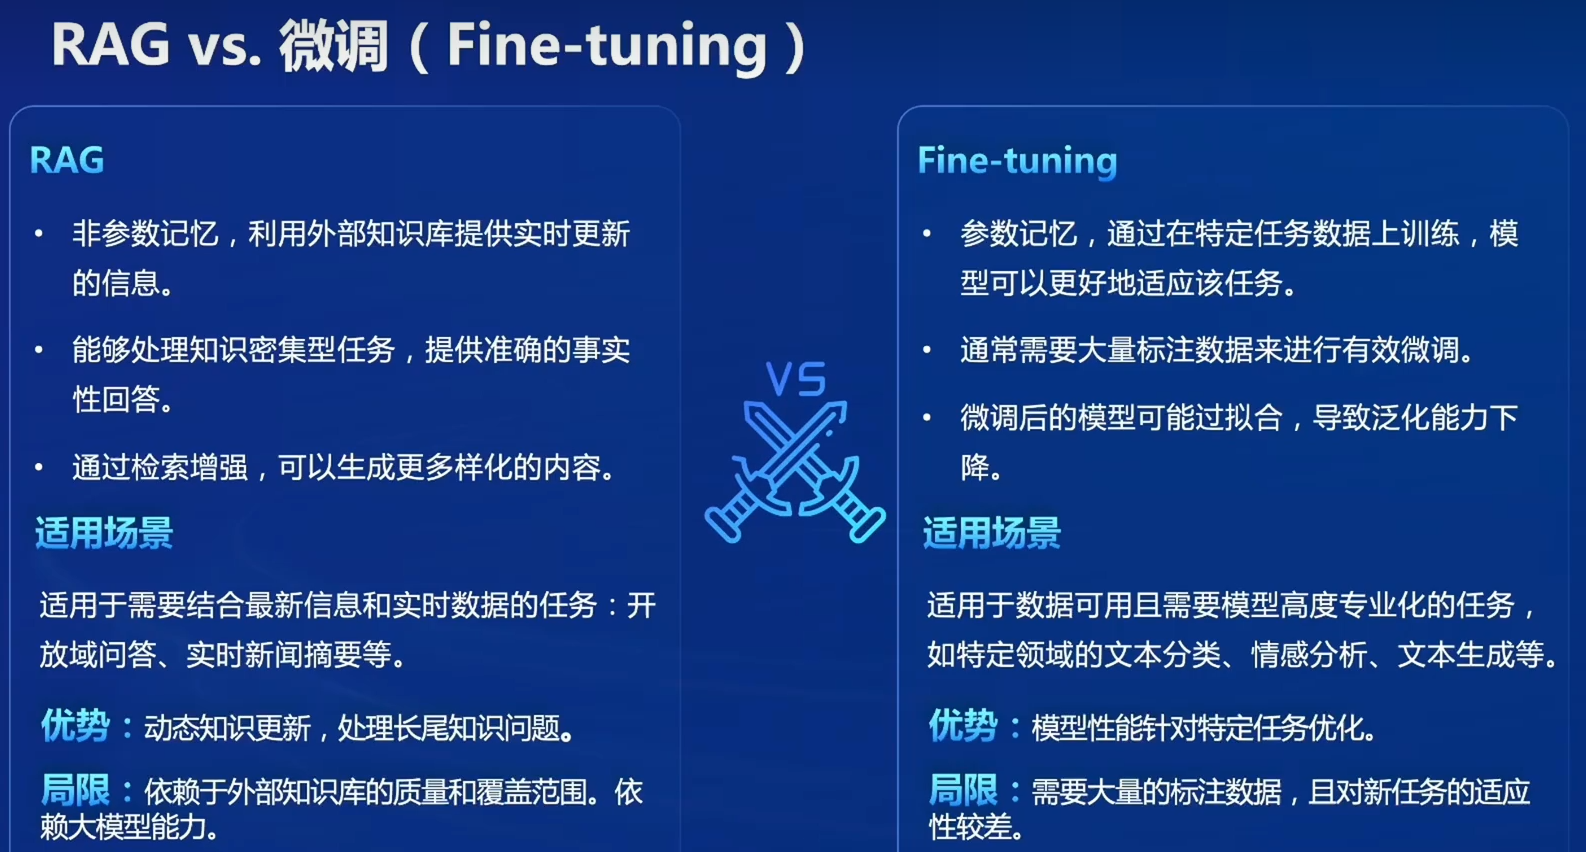

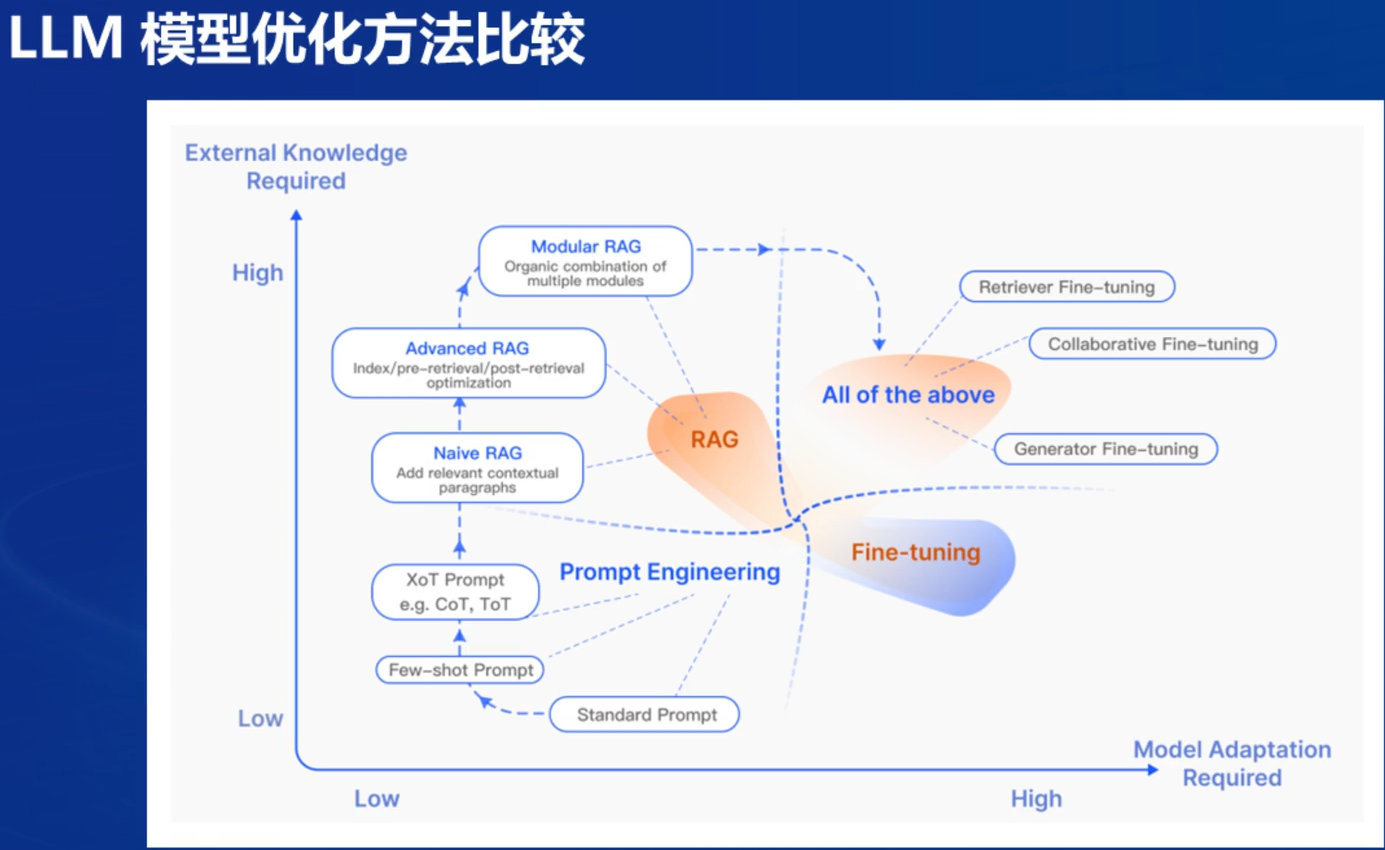

## 如何评价RAG的模型

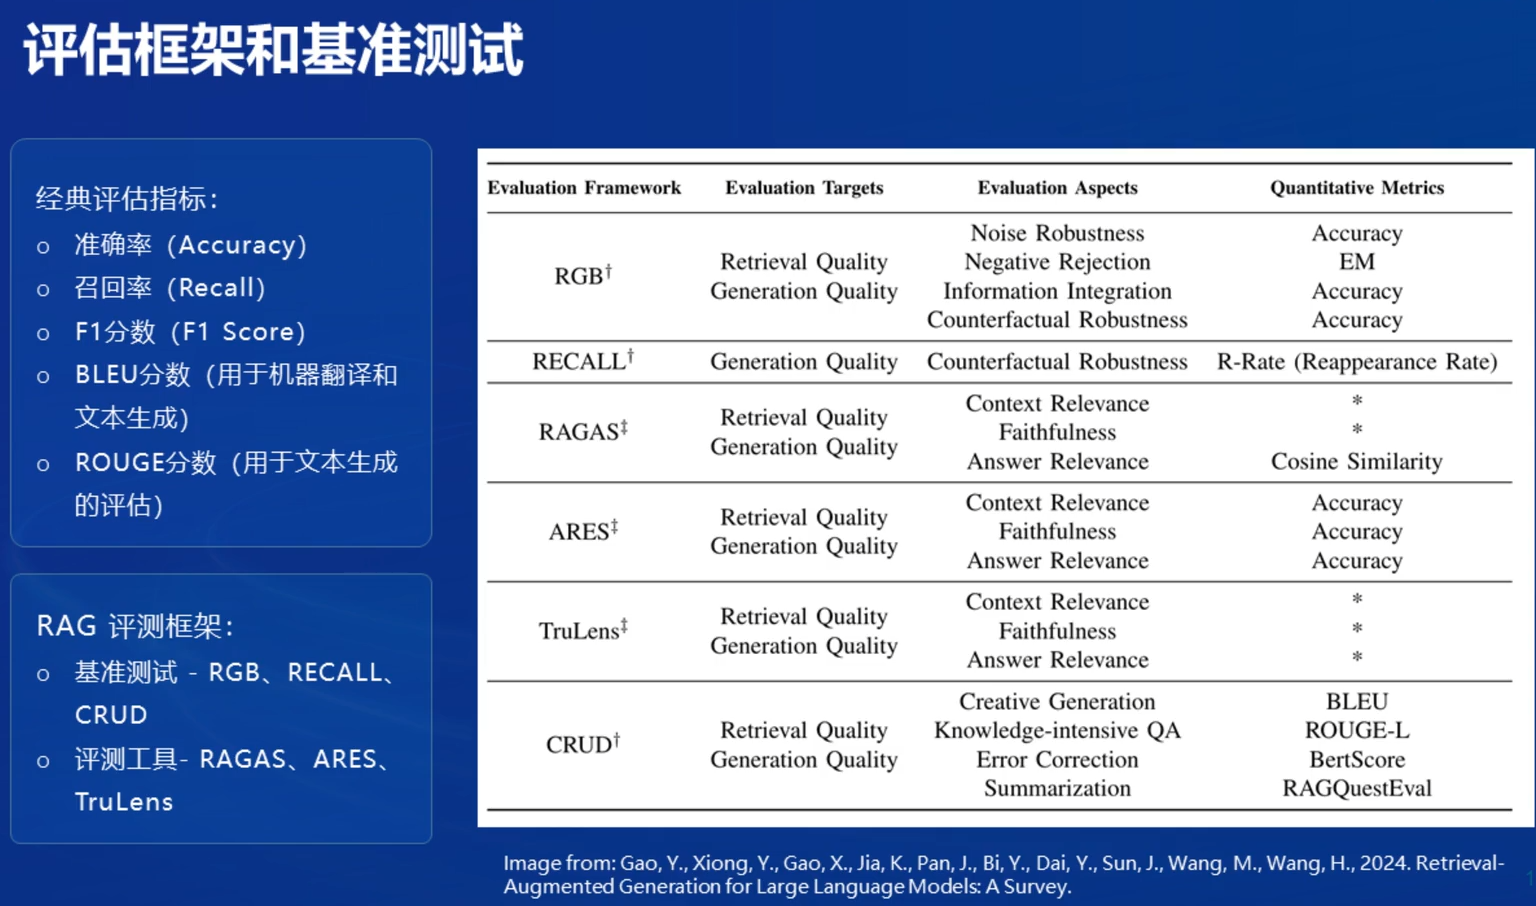

## RAG总结

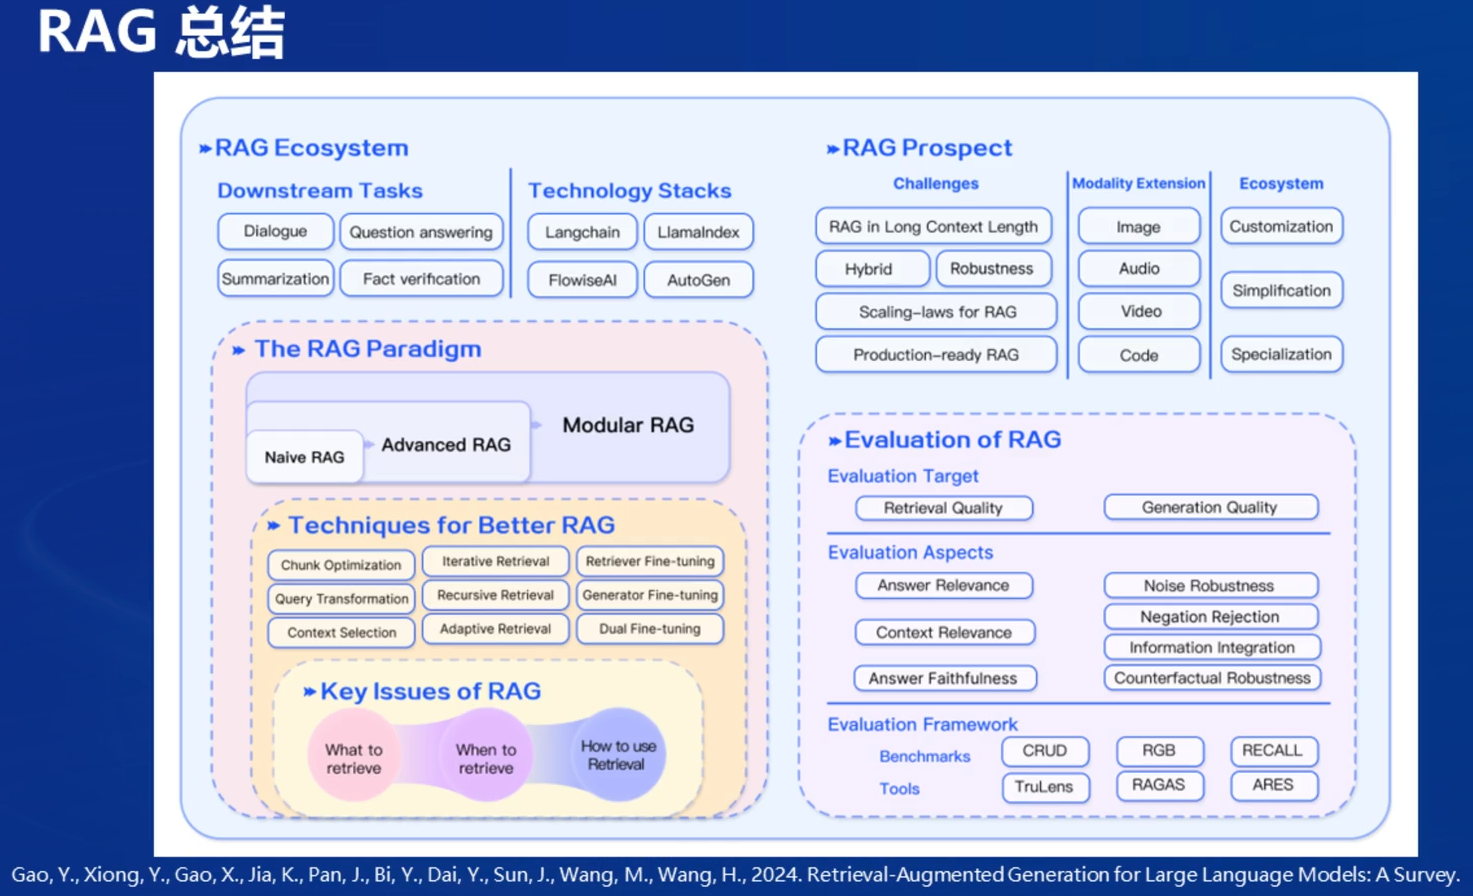

## 茴香豆

是一款应用了RAG技术的开源应用，是RAG应用的具体实现

可以看到茴香豆不仅是一个应用，也是一套非常完善的Pipline，它包含了：

1.知识库构建

2.和前端交互

3.和后端交互

<img src="./img/img-20240412105145.png" width="80%">

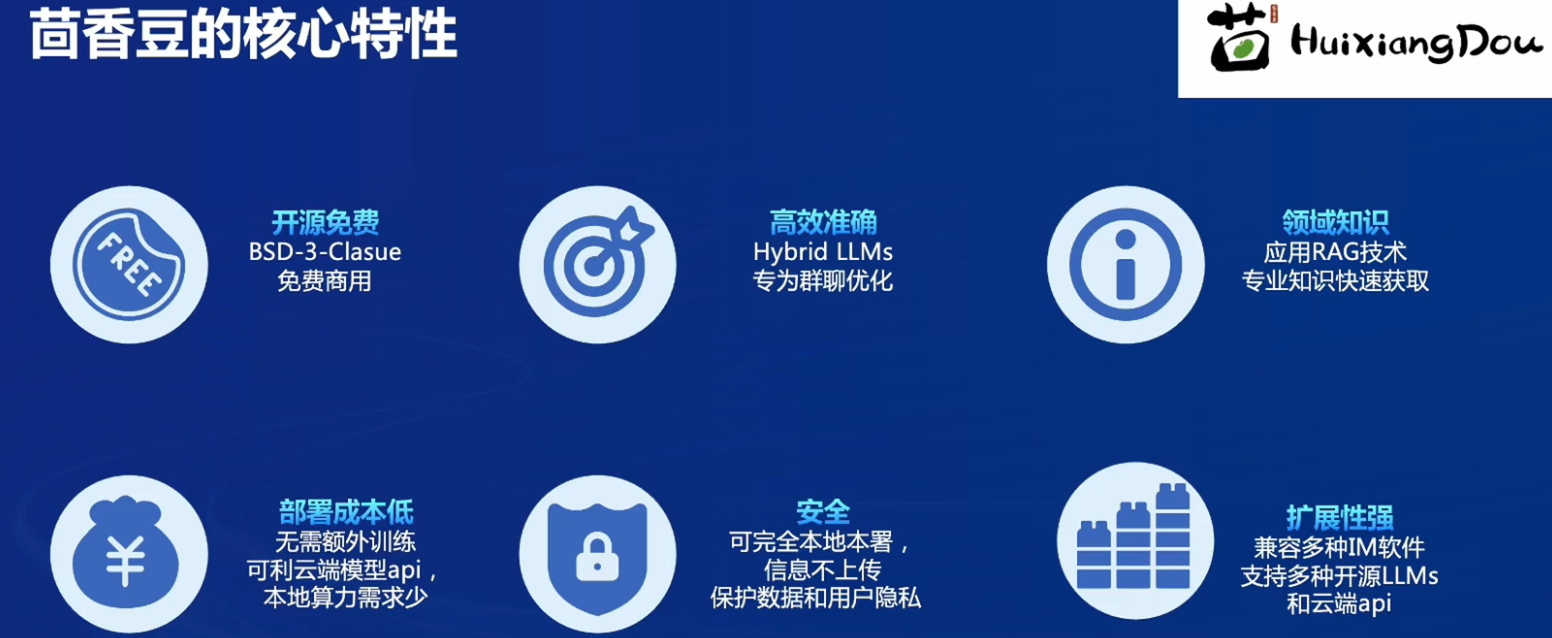

下面是茴香豆的一个**完整的工作流**：

1.用户输入，用大模型给出输入的keyword；

2.对用户的输入进行理解并打分，是否拒答；

3.不拒答的，分别可以在外部知识库 网页 甚至知识图谱中进行检索；

4.对检索的结果给到LLM进行组织；

5.对LLM的输出进行安全检查，确保安全合规；

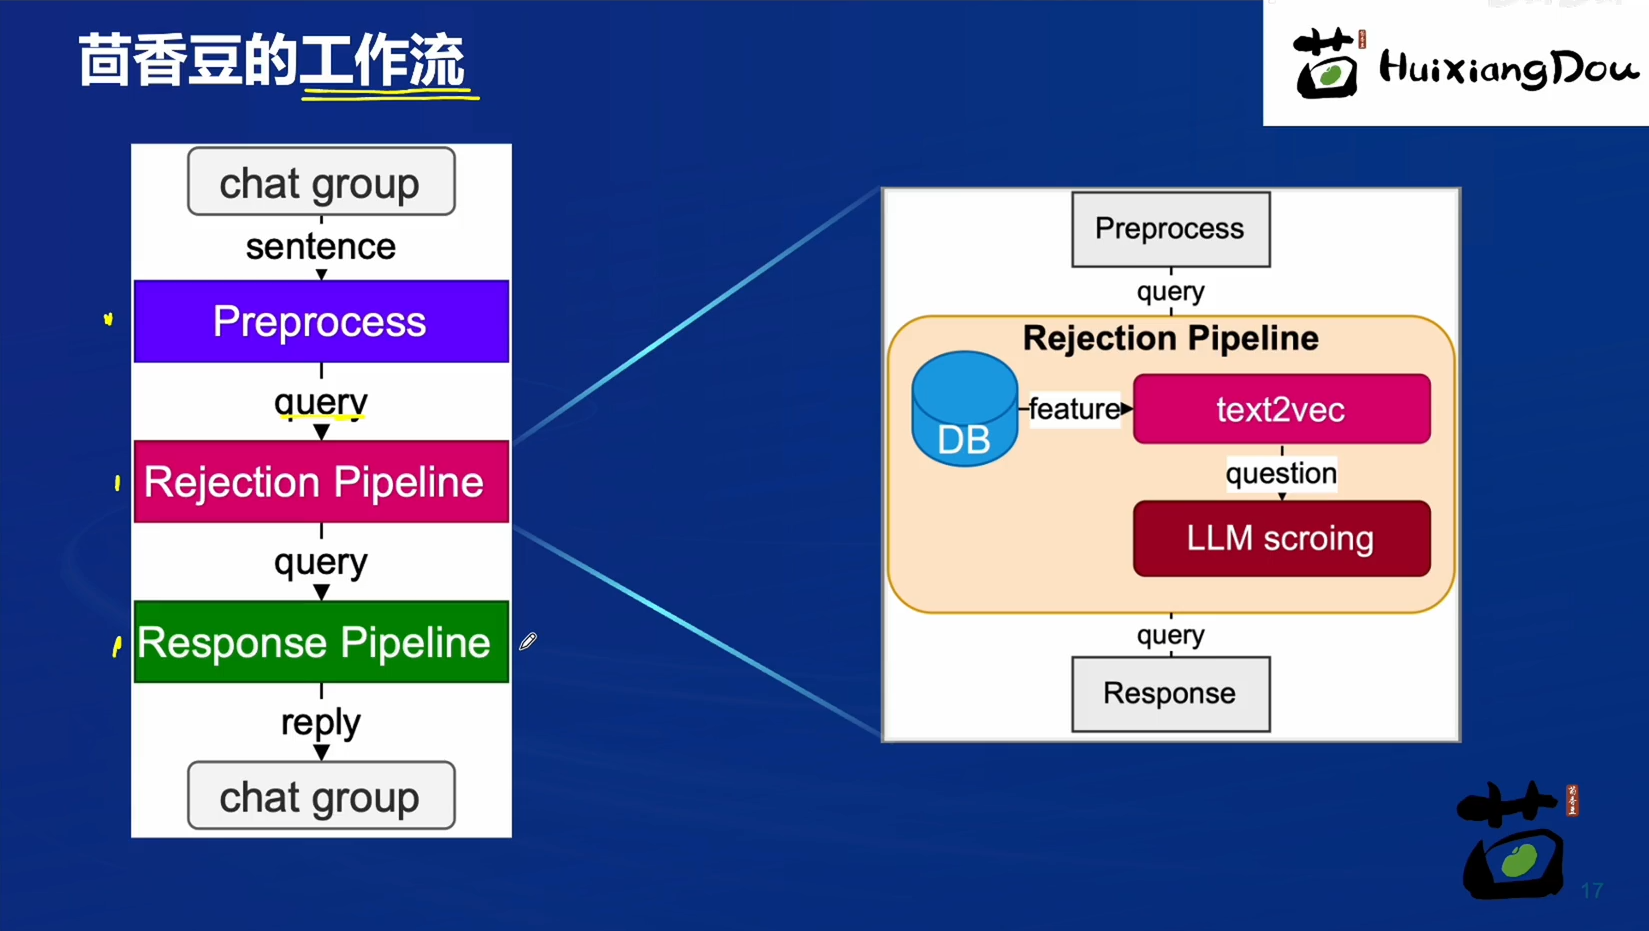

茴香豆链接：https://github.com/InternLM/HuixiangDou